# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Which country has the lowest life expectancy?
+ Which country has the highest economic output?
+ Has life expectancy increased over time in the six countries?
+ Has GDP increased over time in the six countries?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these countries?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

df = pd.read_csv('all_data.csv')

print(df.shape)
print(df.head())
print(df.info())
print(df.describe());

(96, 4)
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)         

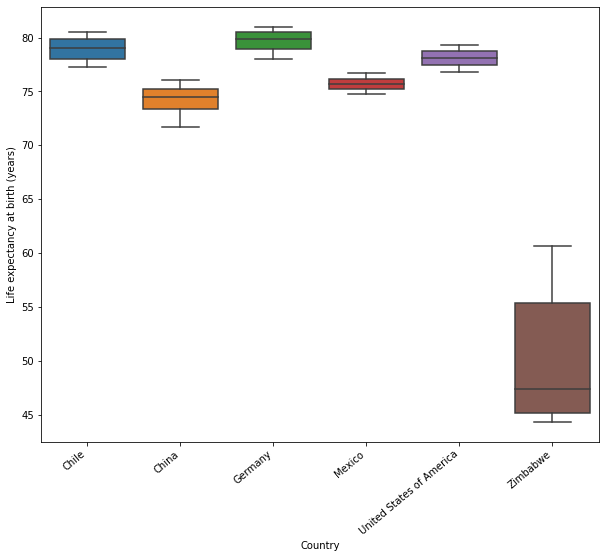

<Figure size 432x288 with 0 Axes>

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xticks(range(len(df.Country.unique())))
ax.set_xticklabels(df.Country.unique(), rotation=40, ha='right')
sns.boxplot(x=df.Country, y=df['Life expectancy at birth (years)'])

plt.show()
plt.clf();

#Zimbabwe has a significantly lower life expectancy at birth than the other countries


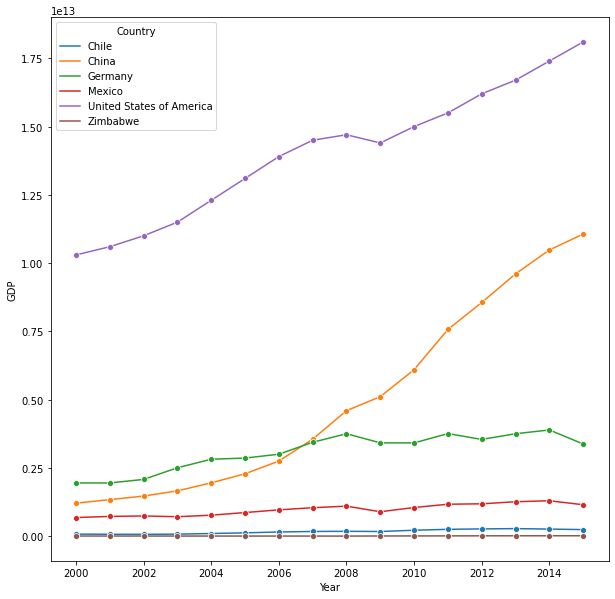

<Figure size 432x288 with 0 Axes>

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country, marker='o')

plt.show()
plt.clf();

#USA is the country with the highest economic output

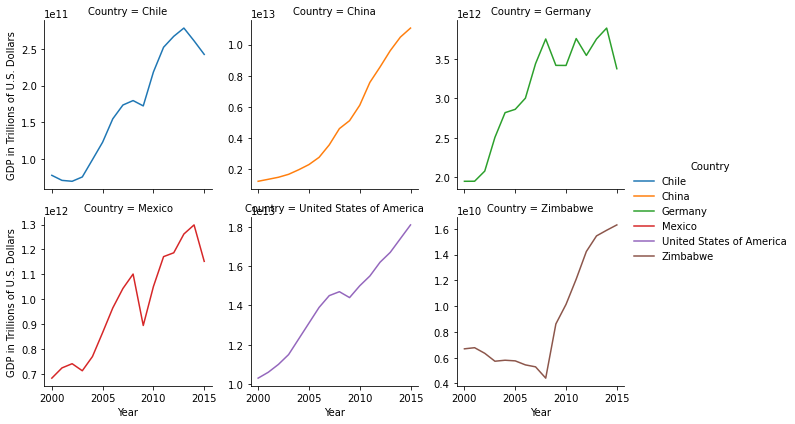

<Figure size 432x288 with 0 Axes>

In [6]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)

graphGDP = (graphGDP.map(sns.lineplot,'Year', 'GDP')
         .add_legend()
         .set_axis_labels("Year", "GDP in Trillions of U.S. Dollars"))

plt.show()
plt.clf();

#GDP has increased over time in all 6 countries

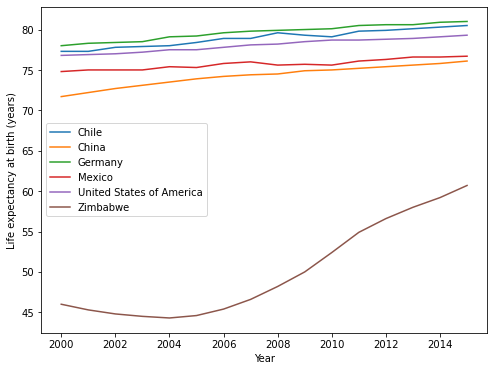

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df['Life expectancy at birth (years)'], hue=df.Country)
plt.legend(loc='center left')

plt.show()
plt.clf();

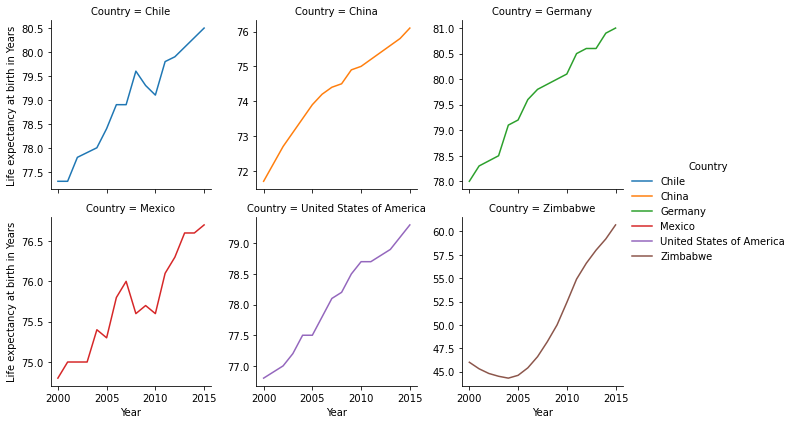

<Figure size 432x288 with 0 Axes>

In [8]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)

graphGDP = (graphGDP.map(sns.lineplot,"Year", "Life expectancy at birth (years)")
         .add_legend()
         .set_axis_labels("Year", "Life expectancy at birth in Years"))

plt.show()
plt.clf();

#life expectancy has increased over time in all 6 countries

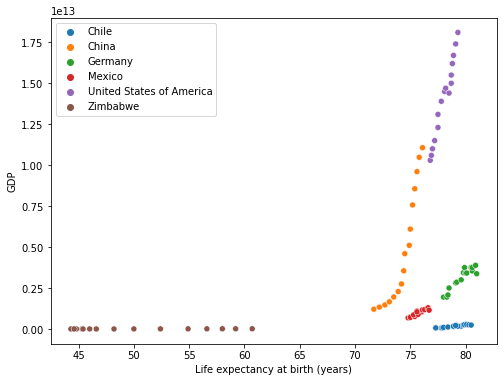

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Life expectancy at birth (years)'], y=df.GDP, hue=df.Country)
plt.legend()

plt.show()
plt.clf();

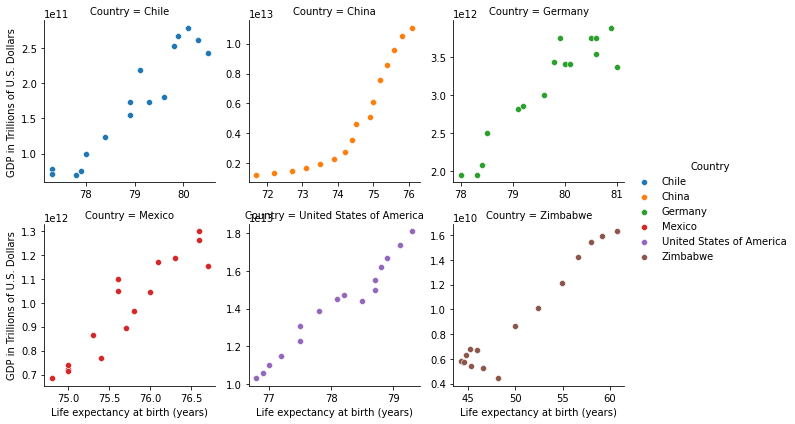

<Figure size 432x288 with 0 Axes>

In [10]:
graph = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False, sharex=False)
graph = (graph.map(sns.scatterplot,"Life expectancy at birth (years)", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

plt.show()
plt.clf();

In [11]:
countries = df.Country.unique()
for country in countries:
    r, pval = pearsonr(df.GDP[df.Country == country], df['Life expectancy at birth (years)'][df.Country == country])
    print('Pearson correlation coefficient of '+ str(country) + ': ' + str(r));
    
#There is a positive correlation between GDP and life expectancy at birth

Pearson correlation coefficient of Chile: 0.9498766659254412
Pearson correlation coefficient of China: 0.9085255408648357
Pearson correlation coefficient of Germany: 0.932698898256127
Pearson correlation coefficient of Mexico: 0.932237716784708
Pearson correlation coefficient of United States of America: 0.9817092382430257
Pearson correlation coefficient of Zimbabwe: 0.9661998955858778


In [12]:
df_country = df.groupby(df.Country).mean()
print(df_country['Life expectancy at birth (years)'])

#Here are the average life expectancies at birth

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64


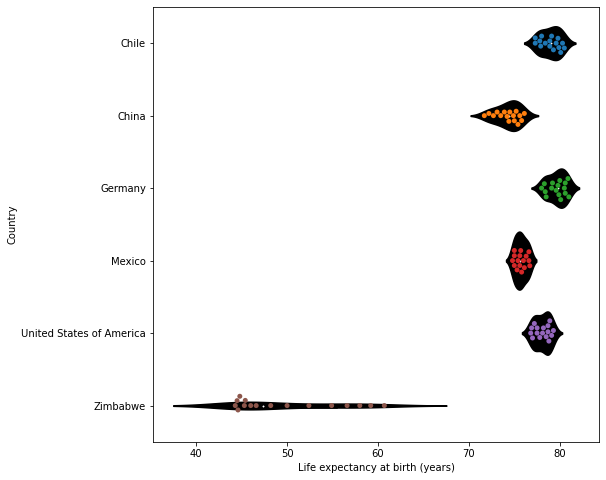

<Figure size 432x288 with 0 Axes>

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

axes = sns.violinplot(ax=axes, x=df["Life expectancy at birth (years)"], y=df.Country, color = "black")
axes = sns.swarmplot(ax=axes, x=df["Life expectancy at birth (years)"], y=df.Country)
axes.set_xlabel("Life expectancy at birth (years)")

plt.show()
plt.clf();